In [10]:
from autogluon.core import TabularDataset
from autogluon.tabular import TabularPredictor
import numpy as np
import pandas as pd
from autogluon.tabular import TabularDataset, TabularPredictor
from matplotlib import pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

data_path= "automl_train_data.csv"
df=pd.read_csv(data_path) # path to colab notebook #replace this with the path to your dataset

bd_data = TabularDataset(data_path)
df_train,df_test=train_test_split(df,test_size=0.2,random_state=1)
data_path= "automl_train_data.csv"

predictor = TabularPredictor.load("./BDmodels/")
y_pred = predictor.predict(df_test)
y_true= df_test['subclass']
xstick=y_true.drop_duplicates()
predictor.evaluate_predictions(y_true, y_pred)

{'accuracy': 0.7350035285815102,
 'balanced_accuracy': 0.32503990542669053,
 'mcc': 0.6632762643271053}

[[  0   0   0   0   0   0   0   0   2   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   1   0   1   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   2   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   2   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0  12   0   0   0   0   0   0   0   0   2   0
    0]
 [  0   0   0   0   0   0   0   0  11   0   0   4   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   0   0   0   2   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   0   0   1  21  33   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   

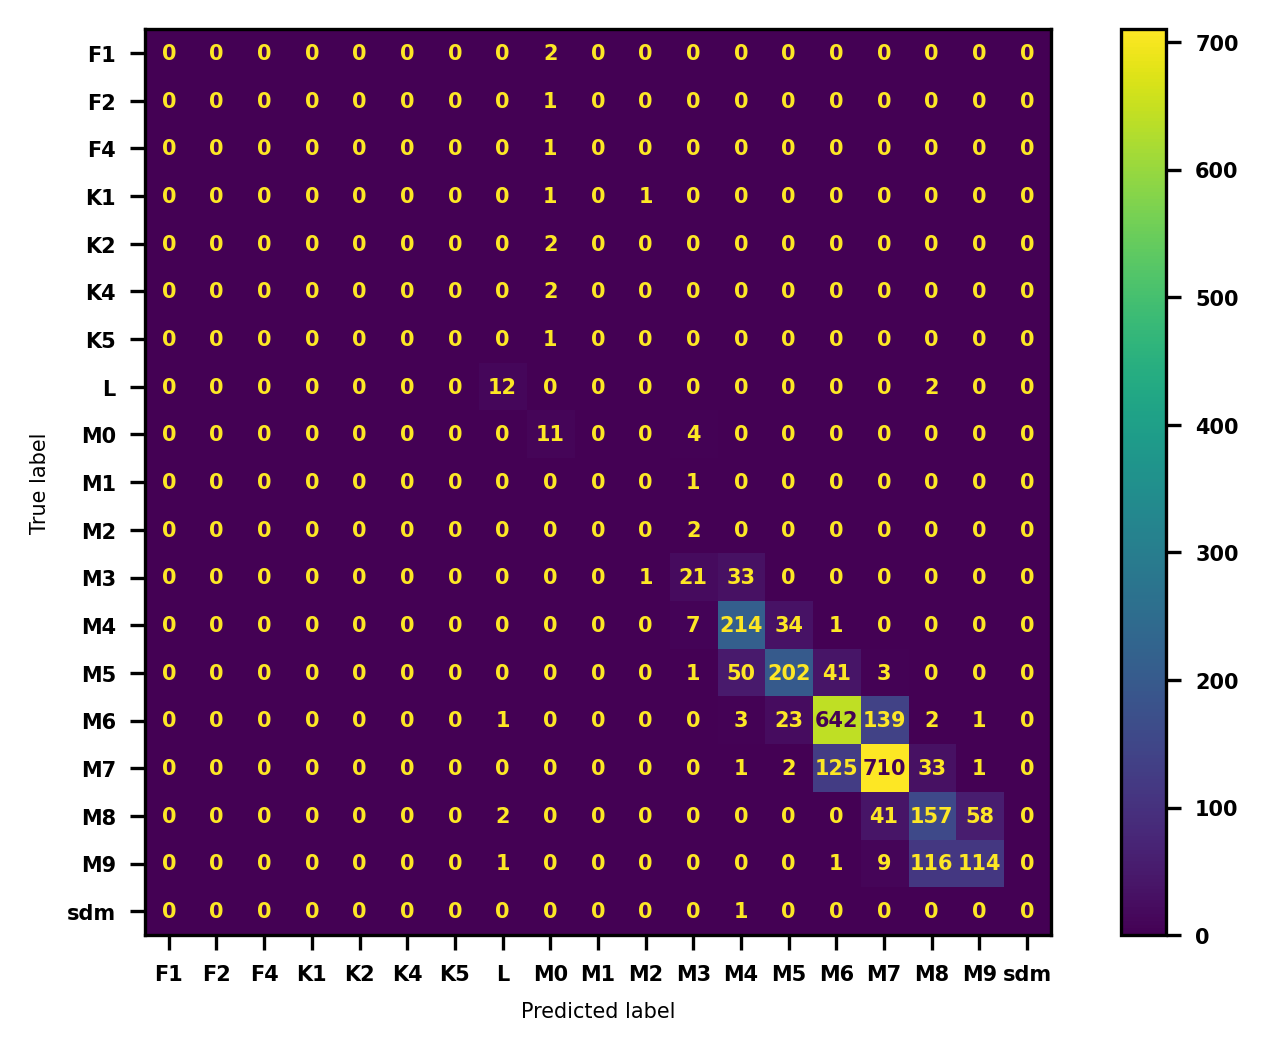

In [11]:
from sklearn.metrics import confusion_matrix
font = {'family' : 'normal',
    'weight' : 'bold',
    'size'   : 5}
plt.rc('font', **font)
plt.rcParams['savefig.dpi'] = 300  # 图片像素
plt.rcParams['figure.dpi'] = 300  # 分辨率
cm=confusion_matrix(y_true,y_pred)
print(cm)
ConfusionMatrixDisplay.from_predictions(y_true, y_pred)

[[0.         0.         0.         0.         0.         0.
  0.         0.         1.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         1.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         1.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.5        0.         0.5        0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         1.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.    

<AxesSubplot:>

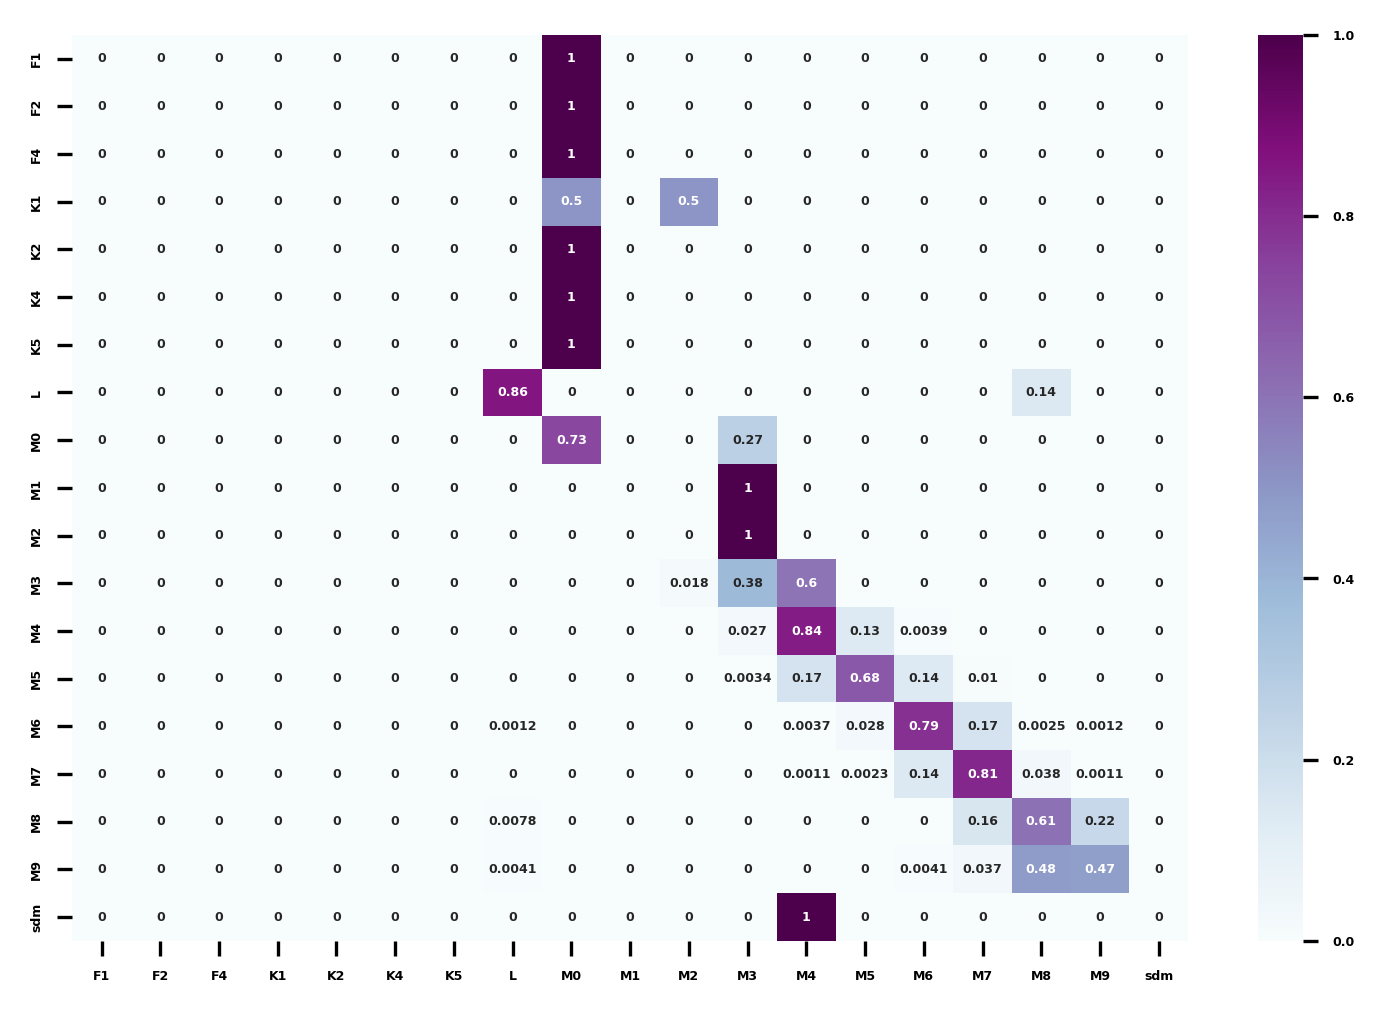

In [17]:
#混淆矩阵percentage
import seaborn as sn
cmpercent=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
print(cmpercent)
tick=xstick.sort_values()
font = {'family' : 'normal',
    'weight' : 'bold',
    'size'   : 3}
plt.rc('font', **font)
sn.heatmap(cmpercent,xticklabels=tick,yticklabels=tick, annot=True, cmap="BuPu")

In [13]:
#输出预测概率
pred_probs = predictor.predict_proba(df_test)
pred_probs.head(5)

,Car,F1,F4,K0,K1,K2,K3,K4,K5,L,...,M2,M3,M4,M5,M6,M7,M8,M9,gM9,sdm
13944,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003205,...,0.003245,0.003549,0.129052,0.835521,0.008145,0.004082,0.003438,0.003373,0.0,0.0
4792,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003169,...,0.003184,0.003238,0.003716,0.026369,0.580872,0.365434,0.003678,0.003425,0.0,0.0
11907,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003907,...,0.004584,0.024923,0.638115,0.269096,0.036524,0.005674,0.004340,0.004268,0.0,0.0
8707,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003525,...,0.003540,0.004518,0.006954,0.186653,0.726749,0.053326,0.003927,0.003779,0.0,0.0
5816,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003163,...,0.003471,0.006687,0.824537,0.140954,0.004288,0.003830,0.003349,0.003286,0.0,0.0


In [18]:
#可解释性
predictor.feature_importance(df_test)

,importance,stddev,p_value,n,p99_high,p99_low
rmag-zmag,0.059333,0.013013,0.007829,3,0.133898,-0.015232
imag-zmag,0.037000,0.007810,0.007265,3,0.081754,-0.007754
rmag-imag,0.016000,0.003000,0.005758,3,0.033190,-0.001190
rmag-W1mag,0.011333,0.007024,0.053866,3,0.051580,-0.028914
rmag-Kmag,0.009667,0.009609,0.111777,3,0.064727,-0.045394
rmag-Jmag,0.009333,0.010408,0.130297,3,0.068974,-0.050308
imag-W2mag,0.009000,0.001732,0.006061,3,0.018925,-0.000925
rmag-W2mag,0.008333,0.007506,0.097193,3,0.051341,-0.034674
rmag-Hmag,0.007667,0.005033,0.059319,3,0.036508,-0.021174
imag-W1mag,0.007000,0.002000,0.013074,3,0.018460,-0.004460


In [19]:
#各个模型的性能
predictor.leaderboard(df_test, silent=True)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,RandomForestGini,0.735004,0.738938,0.456014,0.095999,3.283998,0.456014,0.095999,3.283998,1,True,6
1,WeightedEnsemble_L2,0.735004,0.760177,2.343558,0.519025,175.667243,0.023001,0.001000,0.525035,2,True,14
2,RandomForestEntr,0.733239,0.743363,0.279001,0.089002,5.690965,0.279001,0.089002,5.690965,1,True,7
3,ExtraTreesEntr,0.730064,0.736283,0.351603,0.082004,1.089000,0.351603,0.082004,1.089000,1,True,10
4,CatBoost,0.729711,0.749558,0.015998,0.005018,67.755992,0.015998,0.005018,67.755992,1,True,8
5,XGBoost,0.729358,0.750442,0.051988,0.011997,23.530651,0.051988,0.011997,23.530651,1,True,11
6,ExtraTreesGini,0.726888,0.729204,0.509000,0.083002,1.022972,0.509000,0.083002,1.022972,1,True,9
7,LightGBM,0.725829,0.746903,0.047955,0.015002,7.852998,0.047955,0.015002,7.852998,1,True,5
8,LightGBMXT,0.725829,0.747788,0.088997,0.017003,7.062996,0.088997,0.017003,7.062996,1,True,4
9,LightGBMLarge,0.720536,0.738938,0.349000,0.065973,30.421634,0.349000,0.065973,30.421634,1,True,13


In [21]:
sdss200_12w=pd.read_csv(r'E:\学习资料\天文\作业五\20211123_150w_match_simbad\200wgaiawise22w1_extinc_45_ab_ri_not_repeat.csv')
sdss200_12w_color=sdss200_12w.iloc[:,14:59]
sdss200_12w_color.head()

,rmag-imag,imag-zmag,zmag-Jmag,Jmag-Hmag,Hmag-Kmag,Kmag-W1mag,W1mag-W2mag,W2mag-W3mag,W3mag-W4mag,rmag-zmag,...,rmag-W1mag,imag-W2mag,zmag-W3mag,Jmag-W4mag,rmag-W2mag,imag-W3mag,zmag-W4mag,rmag-W3mag,imag-W4mag,rmag-W4mag
0,3.019872,1.633811,1.780528,0.884312,0.440630,-0.381757,0.267563,2.679499,3.710,4.653683,...,7.377396,4.625087,5.670775,7.600247,7.644959,7.304586,9.380775,10.324458,11.014586,14.034458
1,2.640239,1.480968,1.778527,0.568504,0.284521,0.420790,0.180808,1.199464,3.668,4.121207,...,7.173549,4.714118,4.432614,6.322087,7.354357,5.913582,8.100614,8.553821,9.581582,12.221821
2,2.498402,1.497581,1.675932,0.822408,0.619280,-0.006226,0.330647,2.397174,3.400,3.995983,...,7.107377,4.939622,5.839215,7.563283,7.438024,7.336796,9.239215,9.835198,10.736796,13.235198
3,4.277407,2.480385,5.845236,0.331810,0.118741,0.109515,-0.041553,-0.377425,3.186,6.757792,...,13.163094,8.844134,5.986324,3.327088,13.121541,8.466709,9.172324,12.744116,11.652709,15.930116
4,2.808025,1.478118,2.179874,0.132644,0.437643,0.370435,0.355435,2.282473,3.934,4.286143,...,7.406739,4.954149,5.758504,7.512630,7.762174,7.236622,9.692504,10.044647,11.170622,13.978647


In [22]:
#对sdss数据集进行预测
sdss200_12w_predict=predictor.predict(sdss200_12w_color)
sdss200_12w_predict.head()

0    M8
1    M8
2    M8
3     L
4    M8
Name: subclass, dtype: object

In [26]:
#计数
sdss200_12w_predict.value_counts()

L     29777
M4    24191
M8    19224
M7     6688
M9     4742
M5     2135
M6     1249
M0     1180
M3      544
M2      361
M1        3
Name: subclass, dtype: int64

In [29]:
#gaia数据集
gaia_bp_cut=pd.read_csv(r'E:\学习资料\天文\作业五\gaia_color_cut\gaia_bp_cut_sdss_wise_extinc_45.csv')
gaia_bp_cut_color=gaia_bp_cut.iloc[:,14:59]
gaia_bp_cut_color.head()
gaia_bp_cut_color_predict=predictor.predict(gaia_bp_cut_color)
gaia_bp_cut_color_predict.head()
gaia_bp_cut_color_predict.value_counts()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_17396\1896968469.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  gaia_bp_cut=pd.read_csv(r'E:\学习资料\天文\作业五\gaia_color_cut\gaia_bp_cut_sdss_wise_extinc_45.csv')


M7    30699
M6    12167
M8     8839
M9     3370
M4     1606
M5     1283
L       576
M3      260
M0      160
M1        2
M2        1
Name: subclass, dtype: int64

In [30]:
#gaia rp cut数据集
gaia_rp_cut=pd.read_csv(r'E:\学习资料\天文\作业五\gaia_color_cut\gaia_rpAndbp_rp_cut_sdss_wise_lite_extinc_45.csv')
gaia_rp_cut_color=gaia_rp_cut.iloc[:,13:]
gaia_rp_cut_color.head()
gaia_rp_cut_color_predict=predictor.predict(gaia_rp_cut_color)
gaia_rp_cut_color_predict.head()
gaia_rp_cut_color_predict.value_counts()###

M6    84102
M7    58196
M5    43067
M4    10034
M8    10027
M9     3459
M3     2580
L      1166
M0      764
M1       57
M2       12
Name: subclass, dtype: int64